# <font>Implementation of  SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

In [1]:
#Importing necessary packages.
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [183]:
#Splitting data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [184]:
# Standardizing the data.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [185]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [186]:
#SGD classifier.
#sklearn's sgdclassifier for reference.
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [187]:
clf.fit(X=x_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [188]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))

## Implementing Logistic Regression with L2 regularization Using SGD: without using sklearn


<br>
* Alogorithm :

* Initialize the weight_vector and intercept term to zeros </font>

* Create the loss function  

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector 

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights 
   
    - append this loss in the list 


In [189]:
#Intializing the weights to zeros of d-dim.
def initialize_weights(dim):
    x1=np.arange(len(dim))
    x2=x1.reshape((len(dim)))
    w=np.zeros_like(x2)
    bias=int(False)
    return w,bias

In [190]:
dim=x_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
b = 0


Compute sigmoid

$sigmoid(z)= 1/(1+exp(-z))$

In [192]:
#prepare custom sigmoid function using numpy.
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

Compute loss 

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [194]:
#Implementing the  custom logloss function
import math
def logloss(y_true,y_pred):
  loss=0
  for i in range(len(y_true)):
    loss+=y_true[i]*math.log10(y_pred[i])+(1-y_true[i])*math.log10(1-y_pred[i])
  loss= -1 * (1/len(y_true))*loss
  return loss

Compute gradient w.r.to  'w'

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [196]:
#This function gradient_dw returns gradient w.r.t weights.
import numpy as np
def gradient_dw(x,y,w,b,alpha,N):
  z=np.dot((w.T),x)+b
  dw=x*(y-sigmoid(z))-(alpha*w)/N
  return dw

In [197]:
print(type(x_train))
print(type(y_train))
print(type(w))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'int'>


Compute gradient w.r.to 'b' 

In [199]:
#This function gradient_db returns gradient w.r.t intercept.
def gradient_db(x,y,w,b):
  z=np.dot((w.T),x)+b
  db=y-sigmoid(z)
  return db

Implementing logistic regression

In [201]:
#This predict function computes 1/1+exp(wT*b)
#here we are maintaing 2 boundary conditions of sigmoid(z)=0,1 as we can calculate log for 0,1 values.
def predict(w,b,x):
  n=len(x)
  predict=[]
  for i in range(n):
    z=np.dot(w.transpose(),x[i])+b
    if sigmoid(z)==0:
      predict.append(sigmoid(0.000001))
    elif sigmoid(z)==1:
      predict.append(sigmoid(0.999999))
    else:
      predict.append(sigmoid(z))
  return np.array(predict)

In [202]:
#This function "train" computes the sgd classifier and return the weights,intercept,trainlogloss and testlogloss
def train(x_train,y_train,x_test,y_test,epochs,alpha,eta0):
  N=len(x_train)
  train_log_loss=[]
  test_log_loss=[]
  wi=[]
  bi=[]
  w,b=initialize_weights(x_train[0])
  for i in range(1,epochs+1):
    print("epoch : %s"%i)
    for ele in range(N):
      gdw=gradient_dw(x_train[ele],y_train[ele],w,b,alpha,N)
      gdb=gradient_db(x_train[ele],y_train[ele],w,b)
      w=np.array(w)+(eta0*(np.array(gdw)))
      b=b+(alpha*(gdb))
    wpred1=predict(w,b,x_test)
    test_log_loss.append(float(logloss(y_test,wpred1)))
    wpred2=predict(w,b,x_train)
    train_log_loss.append(float(logloss(y_train,wpred2)))
  return w,b,train_log_loss,test_log_loss

In [203]:
#giving intial values for train function.
%time
alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs=15

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [204]:
#computing the train function.
%time
weights,binter,train1loss,test1loss=train(x_train,y_train,x_test,y_test,epochs,alpha,eta0)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9
epoch : 10
epoch : 11
epoch : 12
epoch : 13
epoch : 14
epoch : 15


In [205]:
len(train1loss)

15

In [206]:
#Comparision of sklearn's implementation with our custom implementation.
print("RESULTS WE GET AFTER SKLEARN IMPLEMENTATION -")
print("WEIGHTS :")
print(clf.coef_)
print("INTERCEPT :")
print(clf.intercept_,"\n")
print("RESULTS WE GET AFTER CUSTOM IMPLEMENTATION -")
print("WEIGHTS :")
print(weights)
print("INTERCEPT :")
print(binter)


RESULTS WE GET AFTER SKLEARN IMPLEMENTATION -
WEIGHTS :
[[-0.89007184  0.63162363 -0.07594145  0.63107107 -0.38434375  0.93235243
  -0.89573521 -0.07340522  0.40591417  0.4199991   0.24722143  0.05046199
  -0.08877987  0.54081652  0.06643888]]
INTERCEPT :
[-1.30580538] 

RESULTS WE GET AFTER CUSTOM IMPLEMENTATION -
WEIGHTS :
[-0.9048262   0.64656179 -0.07822054  0.63777662 -0.3907577   0.9442469
 -0.90299306 -0.07160359  0.41570122  0.42360749  0.25179668  0.05395901
 -0.08823163  0.54374451  0.06700376]
INTERCEPT :
-1.3119223645129903


Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [207]:
# these are the difference in results we got after we implemented sgd and found the optimal weights and intercept
weights-clf.coef_, binter-clf.intercept_

(array([[-0.01475437,  0.01493816, -0.00227909,  0.00670554, -0.00641395,
          0.01189447, -0.00725785,  0.00180162,  0.00978705,  0.00360839,
          0.00457525,  0.00349702,  0.00054823,  0.00292799,  0.00056488]]),
 array([-0.00611698]))

Train vs Test log-loss


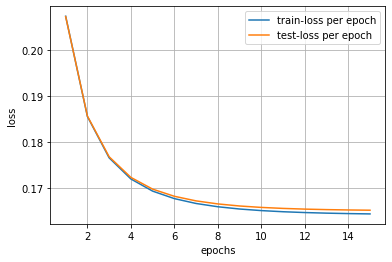

In [208]:
#ploting the train and test logloss.
%matplotlib inline
import matplotlib.pyplot as plt
e=np.arange(1,epochs+1)
print("Train vs Test log-loss")
plt.plot(e,train1loss,label="train-loss per epoch")
plt.plot(e,test1loss,label="test-loss per epoch")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [209]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w.transpose(),X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,x_train))/len(x_train))
print(1-np.sum(y_test  - pred(w,b,x_test))/len(x_test))

1.6978933333333335
1.6986400000000001
